In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv('flight.csv')

In [3]:
df.head()

,Unnamed: 0,acc.date,type,reg,operator,fat,location,dmg
0,0,3 Jan 2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1,1,4 Jan 2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,2,5 Jan 2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,3,8 Jan 2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,4,12 Jan 2022,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o


In [4]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0        acc.date                                 type  \
0              0      3 Jan 2022  British Aerospace 4121 Jetstream 41   
1              1      4 Jan 2022  British Aerospace 3101 Jetstream 31   
2              2      5 Jan 2022                       Boeing 737-4H6   
3              3      8 Jan 2022                  Tupolev Tu-204-100C   
4              4     12 Jan 2022        Beechcraft 200 Super King Air   
...          ...             ...                                  ...   
2495        1245     20 Dec 2018                Cessna 560 Citation V   
2496        1246     22 Dec 2018              PZL-Mielec M28 Skytruck   
2497        1247     24 Dec 2018                       Antonov An-26B   
2498        1248     31 Dec 2018                  Boeing 757-2B7 (WL)   
2499        1249  unk. date 2018               Rockwell Sabreliner 80   

            reg                                           operator fat  \
0        ZS-NRJ

In [5]:
df.isnull().sum()

Unnamed: 0     0
acc.date       0
type           0
reg           92
operator      14
fat           12
location       0
dmg            0
dtype: int64

In [6]:
df.type.value_counts()

type
Cessna 208B Grand Caravan                   114
Antonov An-2R                                58
Beechcraft 200 Super King Air                58
de Havilland Canada DHC-6 Twin Otter 300     34
Cessna 208 Caravan I                         30
                                           ... 
Boeing 767-375ER                              2
Boeing 747-412 (BCF)                          2
Boeing 747-412F (SCD)                         2
Boeing 737-76N (WL)                           2
Rockwell Sabreliner 80                        2
Name: count, Length: 523, dtype: int64

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [8]:
df['acc.date'] = pd.to_datetime(df['acc.date'], errors='coerce')

In [9]:
df['fat'] = pd.to_numeric(df['fat'], errors='coerce')


In [10]:
df_cleaned = df.dropna(subset=['acc.date', 'dmg'])


In [11]:
df_cleaned['reg'].fillna('Unknown', inplace=True)
df_cleaned['operator'].fillna('Unknown', inplace=True)
df_cleaned['fat'].fillna(0, inplace=True)

C:\Users\Ammar Arain\AppData\Local\Temp\ipykernel_14632\28512963.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['reg'].fillna('Unknown', inplace=True)
C:\Users\Ammar Arain\AppData\Local\Temp\ipykernel_14632\28512963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['reg'].fillna('Unknown', inplace=True)
C:\Users\Am

In [12]:
df_cleaned.info(), df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2494 entries, 0 to 2498
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   acc.date  2494 non-null   datetime64[ns]
 1   type      2494 non-null   object        
 2   reg       2494 non-null   object        
 3   operator  2494 non-null   object        
 4   fat       2494 non-null   float64       
 5   location  2494 non-null   object        
 6   dmg       2494 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 155.9+ KB


(None,
     acc.date                                 type       reg  \
 0 2022-01-03  British Aerospace 4121 Jetstream 41    ZS-NRJ   
 1 2022-01-04  British Aerospace 3101 Jetstream 31    HR-AYY   
 2 2022-01-05                       Boeing 737-4H6    EP-CAP   
 3 2022-01-08                  Tupolev Tu-204-100C  RA-64032   
 4 2022-01-12        Beechcraft 200 Super King Air   Unknown   
 
                                         operator  fat  \
 0                                     SA Airlink  0.0   
 1  LANHSA - Línea Aérea Nacional de Honduras S.A  0.0   
 2                               Caspian Airlines  0.0   
 3                       Cainiao, opb Aviastar-TU  0.0   
 4                                        private  0.0   
 
                                             location  dmg  
 0                          near Venetia Mine Airport  sub  
 1  Roatán-Juan Manuel Gálvez International Airpor...  sub  
 2              Isfahan-Shahid Beheshti Airport (IFN)  sub  
 3      Hangz

C:\Users\Ammar Arain\AppData\Local\Temp\ipykernel_14632\306414433.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='type', data=top_20_df, order=top_order, palette='Set2')


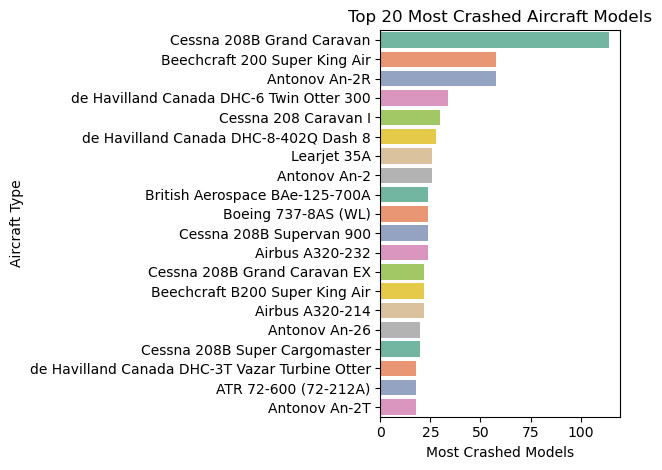

In [13]:
top_20_types = df['type'].value_counts().nlargest(20).index


top_20_df = df[df['type'].isin(top_20_types)]

top_order = top_20_df['type'].value_counts().index

# Plot
sns.countplot(y='type', data=top_20_df, order=top_order, palette='Set2')
plt.xlabel('Most Crashed Models')
plt.ylabel('Aircraft Type')
plt.title('Top 20 Most Crashed Aircraft Models')
plt.tight_layout()
plt.show()

C:\Users\Ammar Arain\AppData\Local\Temp\ipykernel_14632\3415207177.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='dmg', palette='Set2')


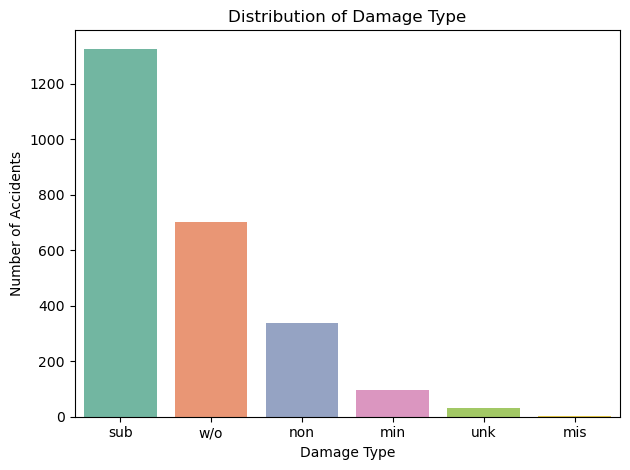

In [14]:

sns.countplot(data=df_cleaned, x='dmg', palette='Set2')
plt.title("Distribution of Damage Type")
plt.xlabel("Damage Type")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

C:\Users\Ammar Arain\AppData\Local\Temp\ipykernel_14632\1073309782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year'] = df_cleaned['acc.date'].dt.year


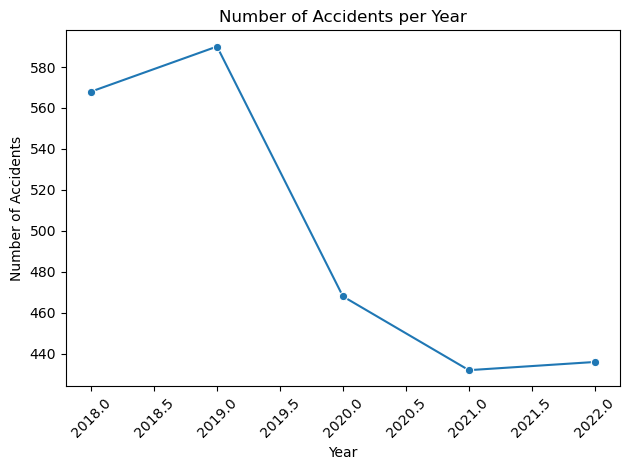

In [17]:
# Extract year from acc.date
df_cleaned['year'] = df_cleaned['acc.date'].dt.year

accidents_per_year = df_cleaned['year'].value_counts().sort_index()
plt.figure()
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values, marker='o')
plt.title("Number of Accidents per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [19]:
le_dmg = LabelEncoder()
df_cleaned['dmg'] = le_dmg.fit_transform(df_cleaned['dmg']) 

C:\Users\Ammar Arain\AppData\Local\Temp\ipykernel_14632\1478652846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['dmg'] = le_dmg.fit_transform(df_cleaned['dmg'])


In [20]:
le_type = LabelEncoder()
df_cleaned['type_encoded'] = le_type.fit_transform(df_cleaned['type'])

C:\Users\Ammar Arain\AppData\Local\Temp\ipykernel_14632\3552663132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['type_encoded'] = le_type.fit_transform(df_cleaned['type'])


In [22]:
features = ['dmg', 'fat', 'type_encoded']
X = df_cleaned[features]
y = df_cleaned['dmg']   

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred = rf_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))    

Accuracy: 1.0
F1 Score: 1.0


In [25]:
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(x_train, y_train)

y_pred_logreg = logreg_model.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_logreg, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.9839679358717435
Logistic Regression F1 Score: 0.9760715460772291
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        72
           3       0.97      1.00      0.99       264
           4       0.00      0.00      0.00         8
           5       1.00      1.00      1.00       134

    accuracy                           0.98       499
   macro avg       0.79      0.80      0.80       499
weighted avg       0.97      0.98      0.98       499



c:\Users\Ammar Arain\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ammar Arain\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ammar Arain\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set t